# Workshop II - Advanced Data Analytics
## Mateo Vanegas - 296175
## Nicolas Urrea - 304871

## Excercise 1

### 1.1

In [1]:
import numpy as np
import matplotlib.pyplot as plt



def generate_correlation_matrix(data: list[list[float]]) -> list[list[float]]:
    """
    Computes the correlation matrix for multiple variables.
    
    :param data: List of lists, where each inner list represents a variable (column).
    :return: Correlation matrix as a 2D list.
    """
    data_array = np.array(data)  # Convert list of lists to NumPy array
    correlation_matrix = np.corrcoef(data_array)  # Compute correlation matrix
    return correlation_matrix.tolist()  # Convert back to list of lists


### 1.2

In [2]:
def interpret_correlation_value(correlation: float) -> str:
    """
    Interprets the strength of a given correlation coefficient.
    
    :param correlation: Correlation coefficient (-1 to 1).
    :return: Interpretation as a string.
    """
    if correlation >= 0.9:
        return "Very strong positive correlation"
    elif correlation >= 0.7:
        return "Strong positive correlation"
    elif correlation >= 0.4:
        return "Moderate positive correlation"
    elif correlation >= 0.2:
        return "Weak positive correlation"
    elif correlation > -0.2:
        return "Very weak or no correlation"
    elif correlation > -0.4:
        return "Weak negative correlation"
    elif correlation > -0.7:
        return "Moderate negative correlation"
    elif correlation > -0.9:
        return "Strong negative correlation"
    else:
        return "Very strong negative correlation"


### 1.3

In [3]:
import seaborn as sns
def plot_correlation_matrix(data: list[list[float]], labels: list[str]) -> None:
    """
    Generates a heatmap of the correlation matrix.
    
    :param data: List of lists where each inner list represents a variable.
    :param labels: List of variable names.
    """
    correlation_matrix = np.array(generate_correlation_matrix(data))  # Compute correlation matrix
    plt.figure(figsize=(8, 6))  # Set figure size
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", xticklabels=labels, yticklabels=labels)
    plt.title("Correlation Matrix Heatmap")
    plt.show()


### Example

Correlation Matrix: [[0.9999999999999999, 0.9999999999999999, -0.9999999999999999], [0.9999999999999999, 0.9999999999999999, -0.9999999999999999], [-0.9999999999999999, -0.9999999999999999, 0.9999999999999999]]
Interpretation of correlation 0.9999999999999999: Very strong positive correlation


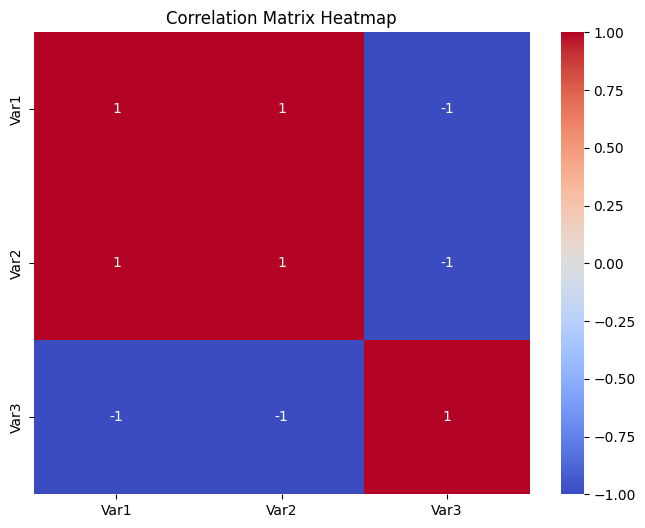

In [4]:
# Sample data (3 variables with 5 observations each)
data = [
    [1, 2, 3, 4, 5],  # Variable 1
    [2, 4, 6, 8, 10],  # Variable 2 (strong positive correlation with Variable 1)
    [5, 4, 3, 2, 1]   # Variable 3 (strong negative correlation with Variable 1)
]

labels = ["Var1", "Var2", "Var3"]

# Compute and print correlation matrix
corr_matrix = generate_correlation_matrix(data)
print("Correlation Matrix:", corr_matrix)

# Interpret one correlation value
corr_value = corr_matrix[0][1]  # Correlation between Var1 and Var2
print(f"Interpretation of correlation {corr_value}: {interpret_correlation_value(corr_value)}")

# Plot the correlation matrix
plot_correlation_matrix(data, labels)


## Excercise 2

### 2.1

In [5]:
from scipy import stats

def perform_one_sample_t_test(data: list[float], population_mean: float) -> dict[str, float]:
    """
    Performs a one-sample t-test.
    
    :param data: List of sample values.
    :param population_mean: Known population mean.
    :return: Dictionary with t-statistic and p-value.
    """
    t_stat, p_value = stats.ttest_1samp(data, population_mean)  # Perform one-sample t-test
    return {"t-statistic": t_stat, "p-value": p_value}


### 2.2

In [6]:
def perform_two_sample_t_test(data1: list[float], data2: list[float]) -> dict[str, float]:
    """
    Performs an independent two-sample t-test.
    
    :param data1: List of values for sample 1.
    :param data2: List of values for sample 2.
    :return: Dictionary with t-statistic and p-value.
    """
    t_stat, p_value = stats.ttest_ind(data1, data2)  # Perform two-sample t-test
    return {"t-statistic": t_stat, "p-value": p_value}


### 2.3

In [7]:
def find_critical_value(alpha: float, df: int) -> float:
    """
    Computes the critical t-value based on significance level and degrees of freedom.
    
    :param alpha: Significance level (e.g., 0.05 for 95% confidence).
    :param df: Degrees of freedom.
    :return: Critical t-value.
    """
    return stats.t.ppf(1 - alpha / 2, df)  # Two-tailed test critical value


### 2.4

In [8]:
def interpret_t_test_result(stats_result: dict[str, float], alpha: float = 0.05) -> str:
    """
    Interprets the results of a t-test.
    
    :param stats_result: Dictionary with t-statistic and p-value.
    :param alpha: Significance level.
    :return: Interpretation as a string.
    """
    p_value = stats_result["p-value"]
    if p_value < alpha:
        return f"Reject the null hypothesis (p={p_value:.5f}): Significant difference."
    else:
        return f"Fail to reject the null hypothesis (p={p_value:.5f}): No significant difference."


### Example

In [9]:
# Sample data
sample1 = [12, 15, 14, 10, 13, 16, 11, 14, 15, 14]  # Sample 1
sample2 = [18, 20, 19, 21, 22, 20, 23, 19, 18, 21]  # Sample 2
population_mean = 13

# One-sample t-test
one_sample_result = perform_one_sample_t_test(sample1, population_mean)
print("One-Sample t-test:", one_sample_result)
print(interpret_t_test_result(one_sample_result))

# Two-sample t-test
two_sample_result = perform_two_sample_t_test(sample1, sample2)
print("\nTwo-Sample t-test:", two_sample_result)
print(interpret_t_test_result(two_sample_result))

# Finding critical value
alpha = 0.05
df = len(sample1) - 1
critical_value = find_critical_value(alpha, df)
print(f"\nCritical Value (alpha={alpha}, df={df}): {critical_value:.5f}")


One-Sample t-test: {'t-statistic': np.float64(0.6666666666666673), 'p-value': np.float64(0.5217069270814155)}
Fail to reject the null hypothesis (p=0.52171): No significant difference.

Two-Sample t-test: {'t-statistic': np.float64(-8.396895462201574), 'p-value': np.float64(1.221433755174456e-07)}
Reject the null hypothesis (p=0.00000): Significant difference.

Critical Value (alpha=0.05, df=9): 2.26216


## Excercise 3

## 3.1

In [10]:
from typing import List, Tuple
def calculate_confidence_interval(data: List[float], confidence: float = 0.95) -> Tuple[float, float]:
    """
    Calculates the confidence interval for the mean of a dataset.
    
    Parameters:
    data (List[float]): The dataset to analyze.
    confidence (float): The confidence level (default is 0.95 for 95% confidence interval).
    
    Returns:
    Tuple[float, float]: The lower and upper bounds of the confidence interval.
    """
    mean = np.mean(data)
    sem = stats.sem(data)  # Standard error of the mean
    margin_of_error = sem * stats.t.ppf((1 + confidence) / 2., len(data) - 1)
    return mean - margin_of_error, mean + margin_of_error

## 3.2

In [11]:
def interpret_confidence_interval(interval: Tuple[float, float], mean: float) -> str:
    """
    Provides an interpretation of the confidence interval.
    
    Parameters:
    interval (Tuple[float, float]): The confidence interval (lower bound, upper bound).
    mean (float): The sample mean.
    
    Returns:
    str: Interpretation of the confidence interval.
    """
    return (f"With a given confidence level, the true mean is expected to be between "
            f"{interval[0]:.2f} and {interval[1]:.2f}. The sample mean is {mean:.2f}.")

## 3.3

In [12]:
def plot_confidence_interval(data: List[float], confidence: float = 0.95) -> None:
    """
    Visualizes the confidence interval by plotting the sample mean and bounds.
    
    Parameters:
    data (List[float]): The dataset to analyze.
    confidence (float): The confidence level (default is 0.95 for 95% confidence interval).
    
    Returns:
    None
    """
    mean = np.mean(data)
    lower, upper = calculate_confidence_interval(data, confidence)
    
    plt.figure(figsize=(8, 4))
    plt.axhline(mean, color='blue', linestyle='--', label='Sample Mean')
    plt.axhline(lower, color='red', linestyle='dotted', label='Lower Bound')
    plt.axhline(upper, color='green', linestyle='dotted', label='Upper Bound')
    
    plt.title(f'{int(confidence * 100)}% Confidence Interval')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

## Example

With a given confidence level, the true mean is expected to be between 11.69 and 14.31. The sample mean is 13.00.


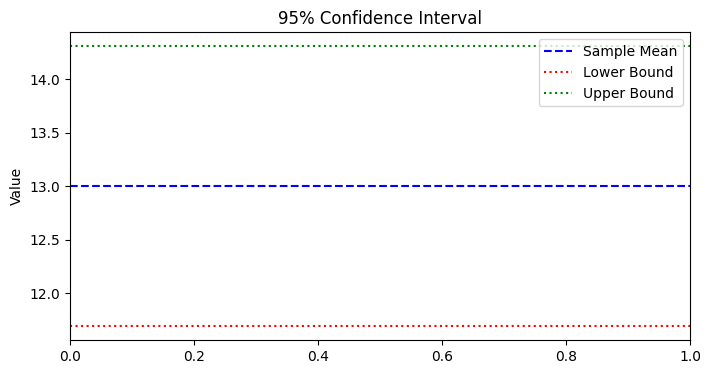

In [13]:
# Example usage
data_sample = [10, 12, 14, 11, 13, 15, 14, 13, 12, 16]
ci = calculate_confidence_interval(data_sample)
print(interpret_confidence_interval(ci, np.mean(data_sample)))
plot_confidence_interval(data_sample)

In [17]:
from sergioamar.unisabana._III import tests
tests(
    generate_correlation_matrix=generate_correlation_matrix,
    interpret_correlation_value=interpret_correlation_value,
    plot_correlation_matrix=plot_correlation_matrix,
    perform_one_sample_t_test=perform_one_sample_t_test,
    perform_two_sample_t_test=perform_two_sample_t_test,
    find_critical_value=find_critical_value,
    interpret_t_test_result=interpret_t_test_result,
    calculate_confidence_interval=calculate_confidence_interval,
    interpret_confidence_interval=interpret_confidence_interval,
    plot_confidence_interval=plot_confidence_interval
)

ModuleNotFoundError: No module named 'implementations'